In [58]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab02.ok')

Assignment: lab02
OK, version v1.12.5



In [59]:
!pip install --upgrade networkx

Requirement already up-to-date: networkx in /srv/app/venv/lib/python3.6/site-packages
Requirement already up-to-date: decorator>=4.3.0 in /srv/app/venv/lib/python3.6/site-packages (from networkx)


In [60]:
!pip install jassign

In [61]:
!pip install tqdm

In [62]:
from IPython.core.display import HTML
from datascience import *
import jassign
import tqdm

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import os
import networkx as nx
plt.style.use('fivethirtyeight')

%matplotlib inline

# Lab 2

## Working with complete network data

To review, in our study of personal networks, we focused on individuals. Starting from a sample of individuals, we gathered information about other people connected to those individuals. 

Today, we will work with a different kind of network data, an entire population of individuals and all of the connections between them. I'll refer to this as the *complete network perspective*. The complete network perspective can be very useful, since it enables us to study how the actual structure of the network can affect important outcomes like the spread of a disease, information about job openings, and even social status.

For almost any social network we study, we are interested in understanding the structure of the complete network. Unfortunately, it is typically extremely difficult to obtain complete network data. Most studies that have done so have put a tremendous amount of time, effort and resources into data collection.  Any time we analyze data---including complete network data---we have to bear in mind the strengths and limitations of the way that the data were collected.

### The Add Health Study

For our first complete network dataset, we're going to be looking at data from a study called [Add Health](http://www.cpc.unc.edu/projects/addhealth). Here is a description of the study, taken from the front page of the [Add Health website](http://www.cpc.unc.edu/projects/addhealth):

<blockquote>
The National Longitudinal Study of Adolescent to Adult Health (Add Health) is a longitudinal study of a nationally representative sample of adolescents in grades 7-12 in the United States during the 1994-95 school year. The Add Health cohort has been followed into young adulthood with four in-home interviews, the most recent in 2008, when the sample was aged 24-32. Add Health is re-interviewing cohort members in a Wave V follow-up from 2016-2018 to collect social, environmental, behavioral, and biological data with which to track the emergence of chronic disease as the cohort moves through their fourth decade of life.
<BR><BR>
Add Health combines longitudinal survey data on respondents’ social, economic, psychological and physical well-being with contextual data on the family, neighborhood, community, school, friendships, peer groups, and romantic relationships, providing unique opportunities to study how social environments and behaviors in adolescence are linked to health and achievement outcomes in young adulthood. The fourth wave of interviews expanded the collection of biological data in Add Health to understand the social, behavioral, and biological linkages in health trajectories as the Add Health cohort ages through adulthood, and the fifth wave of data collection continues this biological data expansion.
</blockquote>

Here are some terms from that description that might not be familiar to you:

* `longitudinal` - logitudinal studies follow people over time, instead of just interviewing people at one point in time
* `cohort` - a group of people that is followed over time; for Add Health, the cohort is the group of people who were interviewed as 7-12th graders in 1994-95.
* `nationally representative` - the participants in the study were chosen in a principled way that enables researchers to make inferences about the US population from the small number of people they interview

Add Health interviewed adolescents in many different schools that were randomly sampled from all over the US. We're going to work with the data from the friendship network of students in just one of those schools today.

Now that we have some background, we'll need to talk a bit about some of the technical details that go into working with complete network data.

### Representing a network in a computer

### Loading a complete network

We will be exploring friendships from an American school; the data can be found at [http://moreno.ss.uci.edu/data.html#adhealth](http://moreno.ss.uci.edu/data.html#adhealth).

The data are in [UCI format](https://gephi.org/users/supported-graph-formats/ucinet-dl-format/). [UCI](https://sites.google.com/site/ucinetsoftware/home) is a tool that can be used to perform all sorts of network analysis. We won't be using UCI in this class, but you might come across it in future classes. For now, we're interested in some of the data that are included with UCI. These UCI datasets contain edge lists which the Python package `networkx` can read in.

The code below opens up the data file, but just reads it as lines of text (instead of interpreting the lines of text as a description of a network).<BR>

Run the code chunk below, and take a look at its output.

In [63]:
os.getcwd()

'/home/jovyan/demog180-su2019/labs/Lab2'

In [64]:
# this file was downloaded from
# http://moreno.ss.uci.edu/data.html#adhealth
edge_file = os.path.join("data", "comm1.dat")
print(edge_file)
with open(edge_file, 'r') as f:
    edge_lines = f.readlines()

data/comm1.dat


In [65]:
edge_lines

['DL\n',
 'N=71\n',
 'FORMAT=EDGELIST1\n',
 'DATA:\n',
 '        1     52  1.00\n',
 '        2     20  1.00\n',
 '        2     27  1.00\n',
 '        2     33  2.00\n',
 '        2     45  1.00\n',
 '        2     46  1.00\n',
 '        2     57  2.00\n',
 '        2     59  2.00\n',
 '        2     62  2.00\n',
 '        2     69  1.00\n',
 '        3      6  2.00\n',
 '        3     29  1.00\n',
 '        3     34  1.00\n',
 '        3     40  2.00\n',
 '        6      3  2.00\n',
 '        6     19  2.00\n',
 '        6     26  2.00\n',
 '        6     40  3.00\n',
 '        6     47  1.00\n',
 '        7     13  2.00\n',
 '        7     15  4.00\n',
 '        7     21  1.00\n',
 '        7     33  1.00\n',
 '        7     42  1.00\n',
 '        7     65  1.00\n',
 '        8      5  1.00\n',
 '        8     14  1.00\n',
 '        8     18  1.00\n',
 '        8     23  6.00\n',
 '        8     35  1.00\n',
 '        8     38  3.00\n',
 '        8     60  1.00\n',
 '        9      

Note that it looks like there are 4 extraneous lines at the top of the file before the edge list starts. Fortunately, the `networkx` package is smart enough to skip these four lines. 

Each line of the dataset has three numbers on it. The first two numbers are the nodes representing the end point of the respective edges, while the third number indicates the edge of each weight.
*[Hint: In order to understand how the data are formatted, read the "Description" section of the [website](http://moreno.ss.uci.edu/data.html#adhealth) where the data can be downloaded.]*



In order to convert the edgelist contained in the datafile into a `networkx` object, we use the `nx.parse_edgelist` function:

In [66]:
g = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])

'g' is now a network object. And we will be working with g from now on.

You can see some more information about how this function works by looking at the help file:

In [67]:
nx.parse_edgelist?

In addition to the lines from the datafile, we also passed a couple other arguments to the `parse_edgelist` function. They are:

* `nodetype` - specifies the Python type used to represent each node. We have integer ids, so we use `int` here
* `data` - describes any extra information about each edge that is contained in the edge list; in our case, there is a floating point value that describes the amount of interaction an edge represents. See the [data description](http://moreno.ss.uci.edu/data.html#adhealth) and the `parse_edgelist` help file for more information

Now that we have read our edgelist into a `networkx` object, we can start to investigate this network.

For example, we can list the edges in the network:

In [68]:
g.edges()

EdgeView([(1, 52), (1, 36), (1, 37), (52, 51), (52, 35), (52, 63), (52, 68), (52, 71), (52, 66), (2, 20), (2, 27), (2, 33), (2, 45), (2, 46), (2, 57), (2, 59), (2, 62), (2, 69), (20, 27), (20, 33), (20, 46), (20, 56), (20, 59), (20, 69), (20, 21), (20, 64), (27, 10), (27, 45), (27, 69), (27, 46), (27, 56), (27, 70), (33, 7), (33, 15), (33, 31), (33, 51), (33, 57), (33, 59), (33, 62), (33, 46), (33, 64), (33, 69), (45, 39), (45, 56), (45, 69), (46, 64), (46, 69), (46, 56), (46, 59), (59, 69), (69, 10), (69, 64), (3, 6), (3, 29), (3, 34), (3, 40), (6, 19), (6, 26), (6, 40), (6, 47), (29, 13), (29, 26), (29, 34), (29, 41), (29, 48), (29, 54), (29, 58), (29, 61), (29, 70), (34, 25), (34, 26), (34, 31), (34, 32), (34, 43), (34, 48), (34, 51), (34, 53), (34, 54), (34, 61), (34, 66), (34, 58), (40, 19), (40, 35), (40, 41), (40, 47), (40, 66), (40, 56), (19, 26), (19, 47), (26, 47), (26, 54), (26, 60), (7, 13), (7, 15), (7, 21), (7, 42), (7, 65), (7, 24), (13, 15), (13, 31), (13, 51), (15, 16)

In [69]:
g.edges(data=True)

EdgeDataView([(1, 52, {'activity_level': 1.0}), (1, 36, {'activity_level': 1.0}), (1, 37, {'activity_level': 1.0}), (52, 51, {'activity_level': 3.0}), (52, 35, {'activity_level': 1.0}), (52, 63, {'activity_level': 1.0}), (52, 68, {'activity_level': 6.0}), (52, 71, {'activity_level': 4.0}), (52, 66, {'activity_level': 4.0}), (2, 20, {'activity_level': 1.0}), (2, 27, {'activity_level': 1.0}), (2, 33, {'activity_level': 1.0}), (2, 45, {'activity_level': 1.0}), (2, 46, {'activity_level': 1.0}), (2, 57, {'activity_level': 2.0}), (2, 59, {'activity_level': 2.0}), (2, 62, {'activity_level': 3.0}), (2, 69, {'activity_level': 1.0}), (20, 27, {'activity_level': 1.0}), (20, 33, {'activity_level': 1.0}), (20, 46, {'activity_level': 3.0}), (20, 56, {'activity_level': 1.0}), (20, 59, {'activity_level': 3.0}), (20, 69, {'activity_level': 2.0}), (20, 21, {'activity_level': 2.0}), (20, 64, {'activity_level': 2.0}), (27, 10, {'activity_level': 2.0}), (27, 45, {'activity_level': 2.0}), (27, 69, {'activit

**Question 1** How many edges are in the network? How many nodes are there?<BR>
[*Hint: there are many ways to answer this question. For example, to count the number of nodes, you may find it helpful to look at nodes() method.*]

<!--
BEGIN QUESTION
name: q1
points: 4
manual: False
-->

In [70]:
n_edges = len(g.edges())
n_nodes = len(g.nodes())
print('number of edges: ', n_edges)
print('number of nodes: ', n_nodes)

number of edges:  220
number of nodes:  69


In [71]:
ok.grade("q1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Drawing graph**

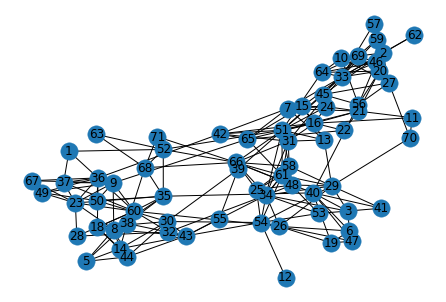

In [74]:
nx.draw(g, with_labels=True)

In order to illustrate a few important concepts, it will be helpful to first investigate a small subset of the network that we just read in.

Remember that a network can be represented mathematically as a `graph`. (Note: this is different concept from a plot, or a graphical display of data, which can also be called a graph.) A subset of a graph is called a `subgraph`.

The `subgraph` function enables us to create a subgraph from a specific set of node ids:

In [75]:
g_subgraph = nx.subgraph(g, [3, 6, 29, 34, 40])

We can get a drawing of this subgraph using the `draw` function:

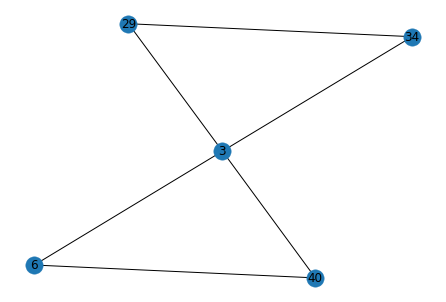

In [76]:
nx.draw(g_subgraph, with_labels=True)

We will discuss drawing networks in more detail below.

### Other representations of the network

We discussed how there are different ways to represent a network in a computer. The edge list is very practical because many real networks are quite *sparse*, meaning that they have relatively few edges

The edge list is a particularly convenient way of storing a description of a network in a file (or in memory) when the network is large and sparse.  Another way to store a network is as an *adjacency matrix*. The *adjacency matrix* is not too practical for large networks because the amount of memory it requires increases quickly with the number of nodes in the network. However, the adjacency matrix turns out to be convenient to work with mathematically, so many formal results rely upon it.

The adjacency matrix is a matrix -- i.e., it is an array of numbers, like a table. It is square, meaning that it has the same number of rows and columns. These rows and columns are ordered so that each id corresponds to one row and column.

Each entry in an adjacency matrix can be located by its coordinates: (row number, column number).  If an entry is 0, it means that there is no edge between the vertices corresponding to the row and column. If an entry is 1, then there is an edge between the vertices corresponding to the row and column. (For those who are curious, [Wikipedia](https://en.wikipedia.org/wiki/Adjacency_matrix) has a discussion of adjacency matrices.)

<BR>

**Practice** Of course, `networkx` will display the edge list and the adjacency matrix representations of the network for you. Call the `edges` method and the `nx.adjacency_matrix` function for subgraph g_subgraph.

In [29]:
g_subgraph.edges()

EdgeView([(34, 3), (34, 29), (3, 6), (3, 29), (3, 40), (6, 40)])

In [32]:
nx.adjacency_matrix(g_subgraph)

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In order to actually show the contents of the adjacency matrix (since we know, in this case, that it's not too big), we can use the `todense` method:

In [33]:
nx.adjacency_matrix(g_subgraph).todense()

matrix([[0, 1, 0, 0, 1],
        [1, 0, 1, 1, 1],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 0, 0],
        [1, 1, 0, 0, 0]], dtype=int64)

There's the matrix -- but, it's a bit hard to interpret it without knowing which node id corresponds to which row and column. If you look at the [help file](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html) for `adjacency_matrix`, you will see that it says that, by default, it orders the rows/columns according to the results of `nodes()`. So we can interpret the matrix above by calling:

In [34]:
g_subgraph.nodes()

NodeView((34, 3, 6, 40, 29))

Check that the matrix you get makes sense by comparing it to the plot above.

### Plotting a network

As we saw above, `networkx` will help us draw a network using the `draw` function:

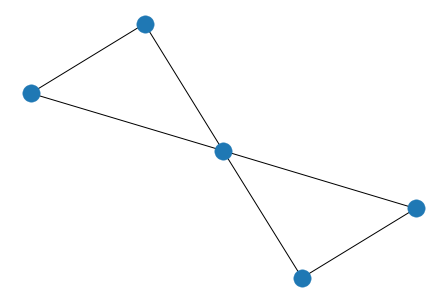

In [39]:
nx.draw(g_subgraph, pos = nx.spring_layout(g_subgraph))

Now look at the help files for the `networkx` package and try to find at least three other ways to draw the network.<BR> 
[*Hint: try typing `nx.draw` and then push Tab; you should see a list with possible completions pop up.*]

Each time you make a new plot, read the help file and try to explain how this plot is made. (If you don't understand the help file, that is OK -- some if it goes beyond what we have discussed so far. Just do your best.)

In [36]:
nx.draw?

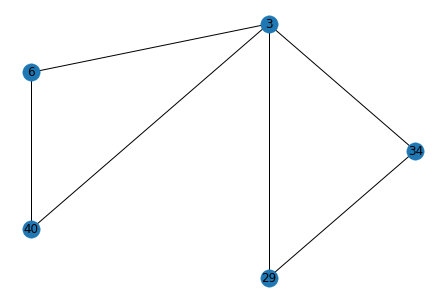

In [43]:
nx.draw_circular(g_subgraph,with_labels = True)

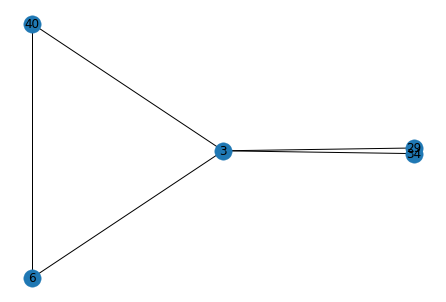

In [44]:
nx.draw_spectral(g_subgraph,with_labels = True)

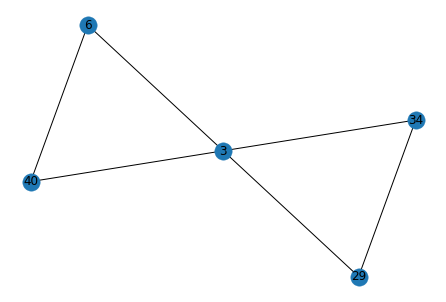

In [45]:
nx.draw_kamada_kawai(g_subgraph,with_labels = True)

**Question 2** What do you learn from these graphs about plotting networks?


<!--
BEGIN QUESTION
name: q2
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

In [ ]:
# A graph can form an infinite number of isomorphic graphs, so even two graphs with completely different shapes
# may represent the same graph. The relationship between the vertices and edges in the graph is all the information 
# that determines a graph.

### The complete network

Remember that, so far, we have mostly been looking at a subgraph of the complete school network. This was helpful because it is easier to illustrate some network concepts with smaller networks. Now we will turn to the entire network.

Let's use the `draw` function to draw the complete school network again. 

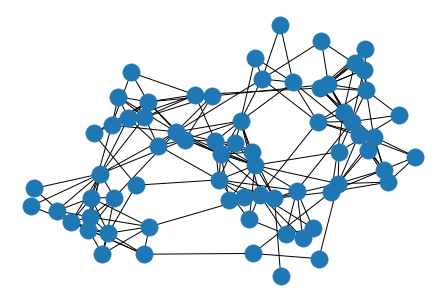

In [46]:
nx.draw(g)

**Practice** Now use the three other drawing methods that you discovered above to produce different plots of this network.

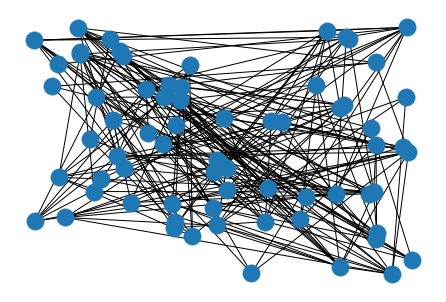

In [55]:
nx.draw_random(g)

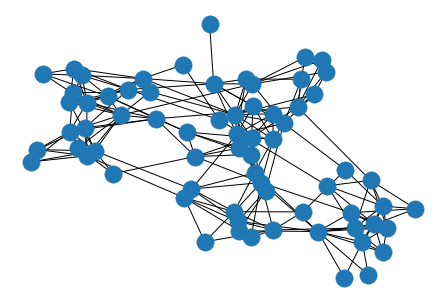

In [53]:
nx.draw_spring(g)

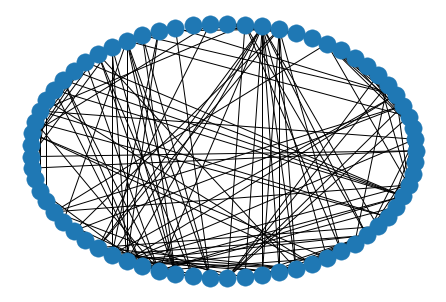

In [49]:
nx.draw_shell(g)

**Question 3** As its name suggests, `draw_random` draws the network with a random layout. You will get a different plot each time you call `draw_random`. Write a simple loop that will call `draw_random` 10 different times, producing 10 different random drawings of this network.<BR>

*[Hint: after each plot you draw in your loop, tell matplotlib that you want to start a new plot (rather than adding to the existing one) by calling `plt.figure()`]*

<!--
BEGIN QUESTION
name: q3
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

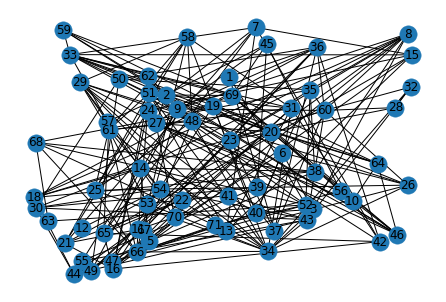

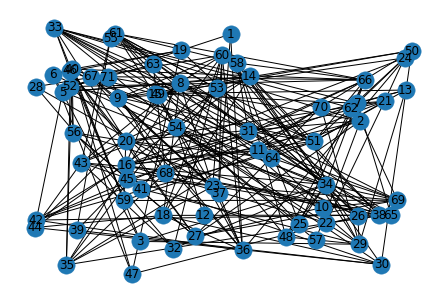

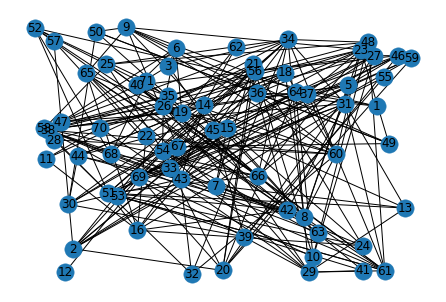

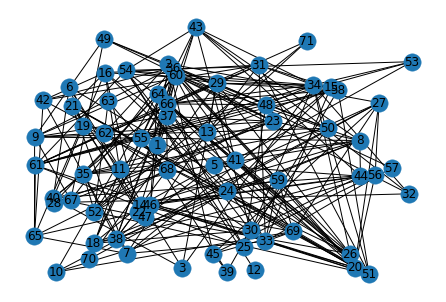

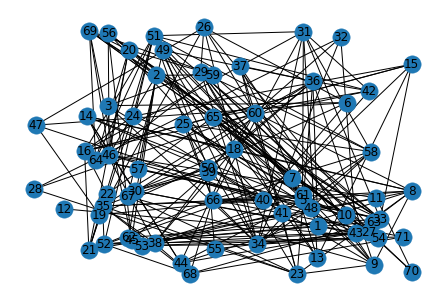

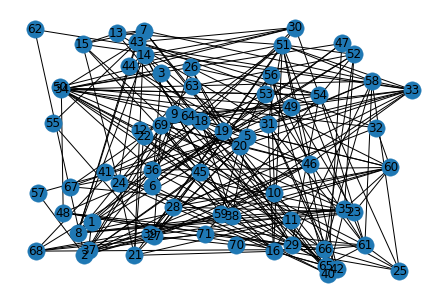

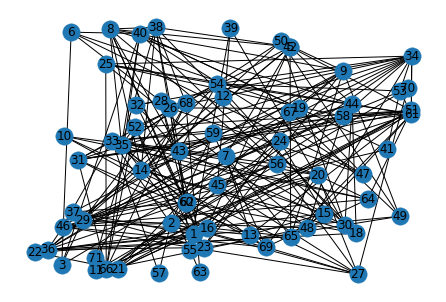

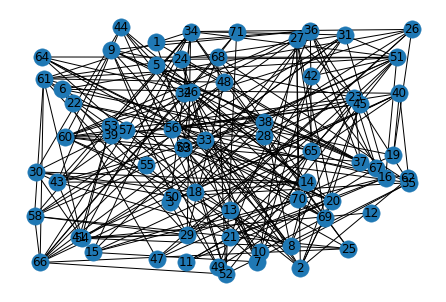

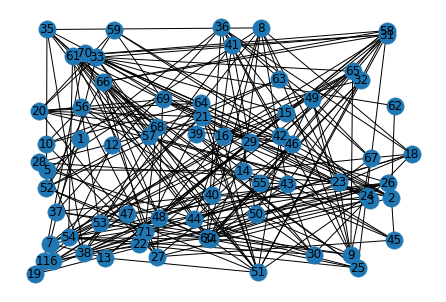

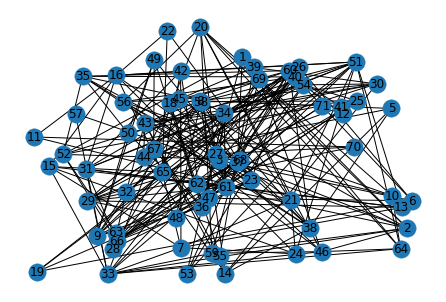

<Figure size 432x288 with 0 Axes>

In [57]:
for i in range(10):
    nx.draw_random(g, with_labels=True)
    plt.figure()

### Degree plots

In our very first class, we talked about a few of the quantitative ways that we could try to summarize the structure of a network. One of these ways was to look at the *degrees* in the network. The degree of a node in the network is the number of other nodes that it is connected to.

Now we will investigate the degrees in this school friendship network.

Think for a second about what the collection of degrees in a network tells us: it tells us, for each node, how connected that node is.  Often, we are interested in understanding how much that varies from node to node. For example, in some networks, it can be the case that every node has exactly the same degree; in other networks, there can be huge differences in the degrees of different nodes.

A degree table will help as understand the connectedness of each node in a graph. Usually we list the ids of the nodes and their degrees in the columns. 

*Note that the `degree` method returns a dictionary (you will try and see it), which is a type of data structure in Python. For our purposes, you can get the value entries in a dictionary using the `values` function. It will take a little exploring to figure out exactly how; feel free to work this out together with your neighbor.*

**Practice** Degree Table for g_subgraph <BR>
Let's first work on creating the degree table for g_subgraph first.

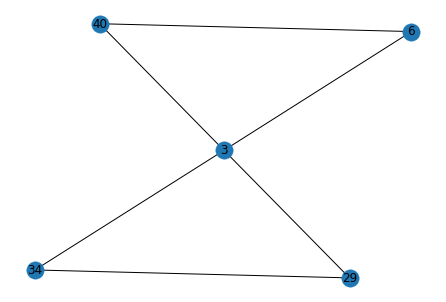

In [77]:
#nx.__version__ (you can double-check which version your nx has)
nx.draw(g_subgraph, with_labels=True)

In [78]:
# the function .degree returns the degrees of each node in the network you are working with
# in the dictionary format
g_subgraph.degree(g_subgraph.nodes())

DegreeView({34: 2, 3: 4, 6: 2, 40: 2, 29: 2})

In [79]:
# you can use the 'list' function to convert it into the list format that is easier to work with
list(g_subgraph.degree(g_subgraph.nodes()))

[(34, 2), (3, 4), (6, 2), (40, 2), (29, 2)]

In [82]:
# then we want to create a table listing all the nodes and their degree levels

#if nx.__version__.startswith('2'): 

g_sub_degrees = Table().with_columns([
    'id', g_subgraph.nodes(), # the first column should have the node ids
    'degree', [y for (x,y) in list(g_subgraph.degree(g_subgraph.nodes()))] # use all the y values in the pairs (x,y) in the list
])

#else:
    #g_degrees = Table().with_columns([
        #'id', g_subgraph.nodes(),
        #'degree', g_subgraph.degree(g_subgraph.nodes()).values()
    #])
    
g_sub_degrees

id,degree
34,2
3,4
6,2
40,2
29,2


Now it is your turn to create degrees table for the complete graph (g).

**Question 4** Create a Table called `g_degrees` that has two columns:
* `id` - has the id of each node in the network
* `degree` - has the degree of each node in the network

*Note that the `degree` method returns a dictionary (you will try and see it), which is a type of data structure in Python. For our purposes, you can get the value entries in a dictionary using the `values` function. It will take a little exploring to figure out exactly how; feel free to work this out together with your neighbor.]*
<BR>

<!--
BEGIN QUESTION
name: q4
points: 4
manual: False
-->

In [83]:
g_degrees = Table().with_columns([
    'id', g.nodes(),
    'degree', [y for (x,y) in g.degree(g.nodes())]
])
g_degrees

id,degree
1,3
52,7
2,9
20,9
27,8
33,12
45,5
46,8
57,2
59,5


In [84]:
ok.grade("q4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now you can make a histogram of the degrees of the nodes in the network

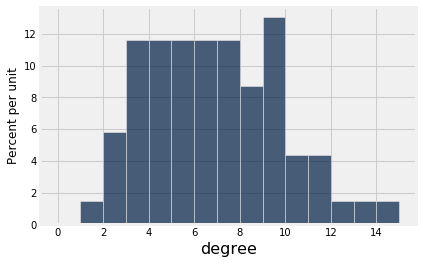

In [86]:
g_degrees.hist('degree', bins=np.arange(0, 16, 1))

## Quantifying network structure

There are many different ways of quantifying network structure. We're going to start by discussing different ways of measuring *network connectivity*. Roughly speaking, a network has a high level of connectivity when any node can reach another node by following a small number of network edges. In the case of the Add Health student friendship networks, a highly connected network could arise when students are friends with many of their fellow students. A poorly connected network, on the other hand, could arise when students are segregated into distinct groups that don't interact much with one another.

<img src="example_network.png" style="width: 60%;">

Some of the ** basic metrics** of this example network are as follows



* number of nodes -  8
* number of edges -  5
* average degree -  avg(1 + 1 + 3 + 1 + 1 + 1 + 1 + 1) = 10/8
* number of connected components -  3



And the **distance** between each pair of nodes is as follows


|             |  node 1 | node 2 |  node 3 |  node 4 |
|   :----:    |  :---:  |  :---: |  :---:  |  :---:  |
|   node 1    |    -    |    2   |    1    |    2    |
|   node 2    |    2    |    -   |    1    |    2    |
|   node 3    |    1    |    1   |    -    |    1    |
|   node 4    |    2    |    2   |    1    |    -    |

Furthermore, some additional **hand-calculated metrics** of the **largest component** of the graph are as follows.



* average path length - 9 / 6
* diameter - 2
* radius - 1
* fraction of nodes in periphery - 3 / 4
* fraction of nodes in core - 1 / 4

### Calculating network metrics with `networkx` module

Now we are going to use the `networkx` package to check the calculations we made by hand.m

In [87]:
# create the network graph
ex_network = nx.Graph([(1,3), (2,3), (3,4), (5,6), (7,8)])

**Practice** Check that your network is correct by drawing it and comparing it to the image above.

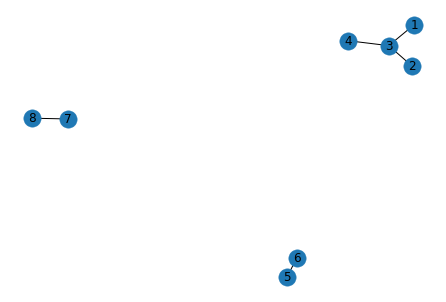

In [88]:
nx.draw(ex_network, with_labels=True)

In [89]:
ex_network.number_of_nodes() # the number of nodes in a graph

8

In [90]:
ex_network.number_of_edges() # the number of edges

5

In [91]:
nx.number_connected_components(ex_network) # Check the number of connected components

3

**Question 5** What is the average degree of this network (calculate it)?


<!--
BEGIN QUESTION
name: q5
points: 2
manual: False
-->

In [135]:
avg_degree = (2 * ex_network.number_of_edges()) / ex_network.number_of_nodes()

In [136]:
ok.grade("q5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Note: <BR>
* For functions that are in the networkx (nx) module: nx._function name_(the network graph name)
* For functions that are inherently associated with the object nature of networh graphs: _graph name_.function() [don't forget this empty bracket]

Several of the metrics we discussed only make sense when the entire network is one connected component. We will take the largest connected component of the example network (as we did when we made the calculations by hand above).

**Practice** Take the largest connected component of the example network. (To do this, you can look at the help file for the `connected_component_subgraphs` function; the example in the help file shows how to do this)

In [137]:
nx.connected_component_subgraphs(ex_network)

<generator object connected_component_subgraphs at 0x7fc7c2028468>

In [138]:
ex_network_lc = max(nx.connected_component_subgraphs(ex_network), key=len)

**Practice** Check if this worked correctly by drawing `ex_network_lc` (the largest component).

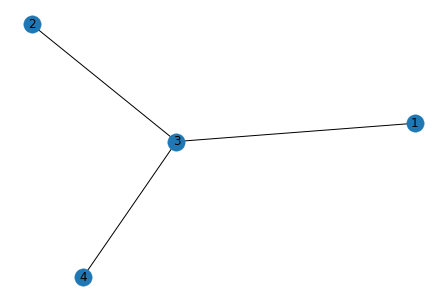

In [139]:
nx.draw(ex_network_lc, with_labels=True)

**Practice** The next few practices ask you to use the following functions to check your calculations:
* `average_shortest_path_length()`
* `radius()`
* `diameter()`
* `periphery()`
* `center()`

In [140]:
nx.average_shortest_path_length(ex_network_lc) # the average shortest path length

1.5

In [141]:
nx.diameter(ex_network_lc) # the diameter:  the maximum distance between any pair of nodes
                           # in the graph

2

In [142]:
nx.periphery(ex_network_lc) # nodes in the periphery

[1, 2, 4]

In [143]:
len(nx.periphery(ex_network_lc)) / ex_network_lc.number_of_nodes() # the fraction of nodes 
                                                                   # in the periphery

0.75

In [144]:
len(nx.center(ex_network_lc)) / ex_network_lc.number_of_nodes() # the fraction of nodes
                                                                # in the center

0.25

### Opening up a school network

Now we have these tools to quantify a network. Recall that the Add Health study sampled schools in many different communities. In part 1, we looked at the network from one of those communities. Now, we're going to look at *all* of the communities. By looking at many different friendship networks, we can hope to better understand the structure of student friendship networks, since we will be able to use evidence from many different networks, instead of from a single example. At the same time, we will try to better understand the different metrics of network structure and how they relate to each other.

In part 1, we had to go through a couple of steps to read a file in and open up a single network. These steps would make a great function, since we will need to go through them each time we want to open 84 different files.

Take a look at this function, which you will use in a moment:

In [145]:
def read_add_health_network(network_id):
    """
    network_id : integer from 1 to 84
    
    read in the Add Health network corresponding to the given id number and
    return it as an undirected networkx object
    """

    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join("data", "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())

Now let's use this function to actually read in all 84 of the Add Health school networks:

*This takes a couple of secs*

In [146]:
number_add_health_networks = 84
add_health_networks = [read_add_health_network(x) for x in range(1,number_add_health_networks+1)]

Done! Next, we will look at the contents of `add_health_networks` to better understand what it is.

### Calculating network statistics for all of the Add Health communities

**Practice** Let's start by making a dataset that has the number of nodes in each of the 84 Add Health community networks.

In [117]:
num_nodes = make_array()

for g in add_health_networks:
    num_nodes = np.append(num_nodes, g.number_of_nodes())

add_health_firsttry = Table().with_columns([
     'id', np.arange(1, number_add_health_networks+1),
     'num_nodes', num_nodes,
    ])

add_health_firsttry

id,num_nodes
1,69
2,105
3,32
4,281
5,157
6,108
7,441
8,204
9,248
10,678


**Question 6** Now, following the pattern above, make a more complete dataset called `add_health` which has columns:

* `id`
* `num_nodes`
* `num_edges`
* `avg_degree`
* `num_components`

<!--
BEGIN QUESTION
name: q6
points: 5
manual: False
-->

In [124]:
num_nodes = make_array()
num_edges = make_array()
avg_degree = make_array()
num_components = make_array()

for g in add_health_networks:
    num_nodes = np.append(num_nodes, g.number_of_nodes())
    num_edges = np.append(num_edges, g.number_of_edges())
    avg_degree = np.append(avg_degree, (g.number_of_edges() * 2 / g.number_of_nodes()))
    num_components = np.append(num_components, nx.number_connected_components(g))

add_health = Table().with_columns([
     'id', np.arange(1, number_add_health_networks+1),
     'num_nodes' , num_nodes,
     'num_edges', num_edges,
     'avg_degree', avg_degree,
     'num_components', num_components
    ])
add_health

id,num_nodes,num_edges,avg_degree,num_components
1,69,220,6.37681,1
2,105,349,6.64762,2
3,32,91,5.6875,1
4,281,1136,8.08541,1
5,157,730,9.29936,1
6,108,378,7,1
7,441,1700,7.70975,3
8,204,809,7.93137,1
9,248,1004,8.09677,1
10,678,2795,8.24484,1


In [125]:
ok.grade("q6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Practice** We can make some histograms that show the distribution of each column (except for `id`).


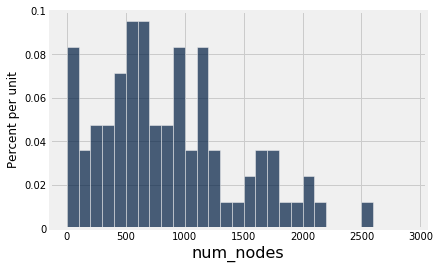

In [126]:
add_health.hist('num_nodes', bins=np.arange(0,3000,100)) # what will happen if you remove the
                                                         # "bins" part?

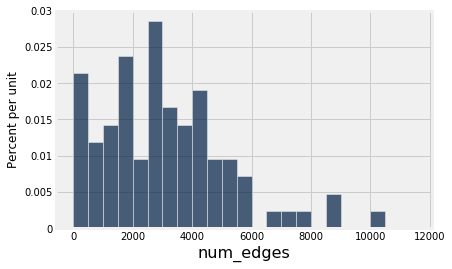

In [127]:
add_health.hist('num_edges', bins=np.arange(0,12000,500))

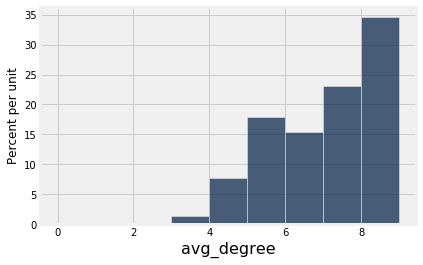

In [128]:
add_health.hist('avg_degree', bins=np.arange(0,10,1))

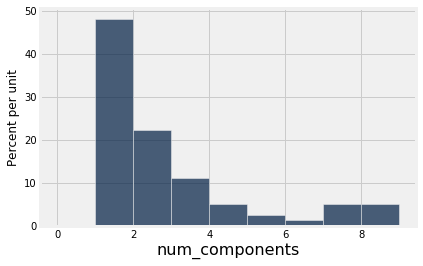

In [129]:
add_health.hist('num_components', bins=np.arange(0,10,1))

### Relationship between metrics of network structure

Remember that the goal of these different metrics is to try to find a way to summarize the structure of a network.  It turns out that this is too hard a task to have a single solution: the best way to summarize or describe a network can depend a lot on what you are interested in understanding about the network. For example, one type of summary might tell you about what networks are at high or low risk of quickly spreading an infectious disease and a different type of network metric might tell you about how hierarchical or egalitarian relationships between network members are.

It would be very helpful to understand how these different metrics are related to each other. For example, if two metrics always increase or decrease together, that might tell us that they are capturing the same underlying aspect of network structure. On the other hand, if two metrics are totally unrelated to one another, then that might tell us that each one captures an independent aspect of network structure.

One way to investigate this topic would be to use math to try to derive results that relate the different network metrics to each other. That's a great thing to do (and there has been a lot of work on this topic). But since we're learning how to analyze data, we're going to take a different approach: we're going to use our empirical dataset to see how these metrics behave in a set of real-world friendship networks.

**Practice** Make a scatterplot that investigates the relationship between each of the four pairs of metrics in the previous question. For each scatter plot, briefly comment on whether it suggests that your prediction is correct or not. (We're not doing any formal tests here, so this evidence will only be suggestive.)

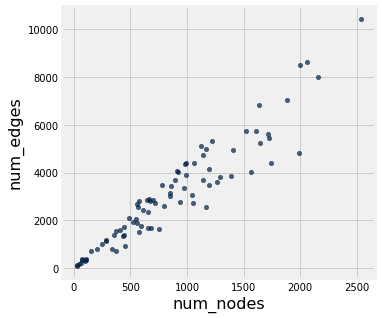

In [130]:
add_health.scatter('num_nodes', 'num_edges')

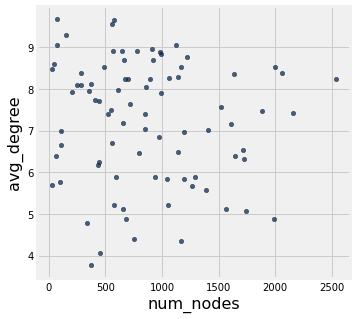

In [131]:
add_health.scatter('num_nodes', 'avg_degree')

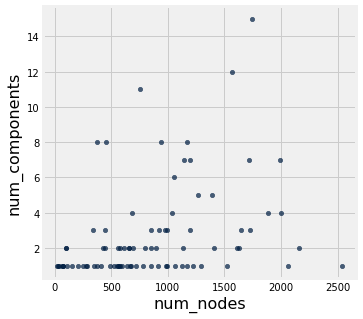

In [132]:
add_health.scatter('num_nodes', 'num_components')

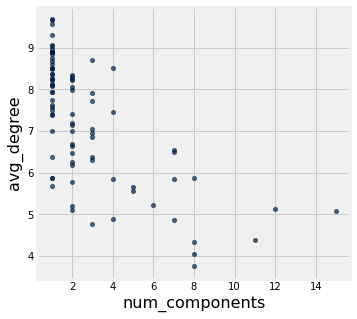

In [133]:
add_health.scatter('num_components', 'avg_degree')

### Rerun the tests and submit your lab

In [147]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

Finished running all tests.


In order to submit your assignment, run the next cell.

You can submit as many times as you want (up to the deadline: July 22th, Monday 12pm).

In [148]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('lab02.ipynb', 'lab02.pdf')
ok.submit()

Generating PDF...
Saved lab02.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab02.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: ziqiyuan123@berkeley.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: zEFqPbdNTwUfkNC7blM55rrpyPHsEP
Successfully logged in as ziqiyuan123@berkeley.edu
Submit... 100% complete
Submission successful for user: ziqiyuan123@berkeley.edu
URL: https://okpy.org/cal/demog180/su19/lab02/submissions/E8gVNY

